In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Setting up dataframe
file = 'Data/london_weather.csv'
df = pd.read_csv(file)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


1. Convert the date column to datetime dtype. Double-check the result. Is it what you expected? If not, be sure to correct it by entering the appropriate format!

In [3]:
# We can run a datetime method for the date column to see results
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1970-01-01 00:00:00.019790101
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1970-01-01 00:00:00.019790102
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1970-01-01 00:00:00.019790103


In [4]:
# We need to clear up the datetime entries
# Let's use a format code to make datetime presentable
fmt = "%B %d, %Y"
df.loc[0,'datetime'].strftime(fmt)

'January 01, 1970'

In [5]:
# Better. Now we will define a new column with clean format
df['datetime_fmt'] = df['datetime'].dt.strftime(fmt)
df['datetime_fmt'].head()

0    January 01, 1970
1    January 01, 1970
2    January 01, 1970
3    January 01, 1970
4    January 01, 1970
Name: datetime_fmt, dtype: object

In [6]:
# This isn't displaying proper order
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['datetime'].head()

0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: datetime, dtype: datetime64[ns]

In [7]:
# Setting index as datetime
df = df.set_index('datetime')
df = df.drop(columns = ['datetime_fmt','date'])
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
### Select only from years 2000 onward.
### We also only want the following columns: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df.loc['2000-01-01':]
df = df.drop(columns = ['cloud_cover', 'sunshine', 'global_radiation', 'pressure'])
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [9]:
# A timeseries of a df column would be helpful to visualize
ts = df['mean_temp'].copy()
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

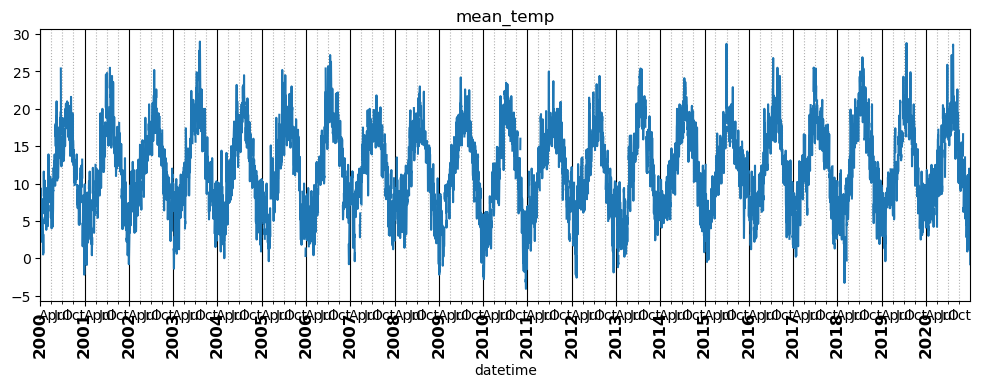

In [10]:
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

## Impute missing values

In [11]:
# We'll need a dictionary of columns
df_ts = df.copy()

In [12]:
# Let's just select last five years so plots are readable
df_ts = df_ts.loc['2016-01-01':]

In [13]:
df_ts

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2016-01-01,11.3,5.6,1.3,2.8,0.0
2016-01-02,9.7,6.8,2.2,5.6,0.0
2016-01-03,10.9,7.3,4.9,7.2,0.0
2016-01-04,10.1,8.3,5.7,0.4,0.0
2016-01-05,9.2,7.6,5.1,0.4,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


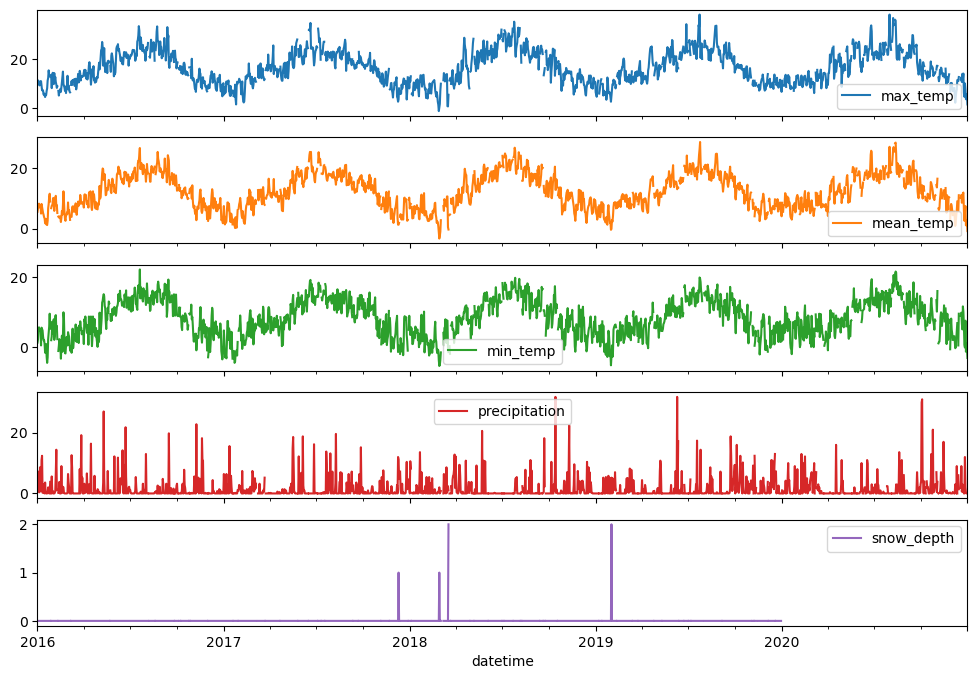

In [14]:
# Now let's plot the features
df_ts.plot(figsize = (12,8), subplots=True);

In [15]:
# Snow depth is missing the last year of data. Otherwise there is no obvious gaps to indicate missing data
# Let's check nulls
df_ts.isna().sum()

max_temp         102
mean_temp        103
min_temp          98
precipitation    102
snow_depth       436
dtype: int64

In [16]:
# Given the regularity of first three columns and semi-predictable patterns, we can interpolate
df_ts['max_temp'] = df_ts['max_temp'].interpolate()
df_ts['mean_temp'] = df_ts['mean_temp'].interpolate()
df_ts['min_temp'] = df_ts['min_temp'].interpolate()

In [17]:
# checking that nulls were imputed
df_ts.isna().sum()

max_temp           0
mean_temp          0
min_temp           0
precipitation    102
snow_depth       436
dtype: int64

In [18]:
import numpy as np

In [19]:
# Rainfall appears frequent enough we could impute mean into nulls
df_ts['precipitation'] = df_ts['precipitation'].fillna(np.mean(df_ts['precipitation']))
df_ts['precipitation'].isna().sum()

0

In [20]:
# Snowfall is far too irregular to predict or impute. Will label nulls as zeroes
df_ts['snow_depth'] = df_ts['snow_depth'].fillna(0)
df_ts.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

## Plot the the mean, min, and max temps for 2018-2020 as 1 line graph .

In [21]:
# We can continue with our timeseries df
df_ts = df_ts.loc['2018-01-01':'2020-12-31', ['min_temp','mean_temp','max_temp']]
df_ts

,min_temp,mean_temp,max_temp
datetime,,,
2018-01-01,5.4,6.7,12.30
2018-01-02,3.5,7.9,10.80
2018-01-03,5.7,8.2,12.90
2018-01-04,5.5,7.7,9.35
2018-01-05,5.3,7.2,5.80
...,...,...,...
2020-12-27,7.6,7.5,7.50
2020-12-28,-1.3,1.1,3.60
2020-12-29,1.1,2.6,4.10


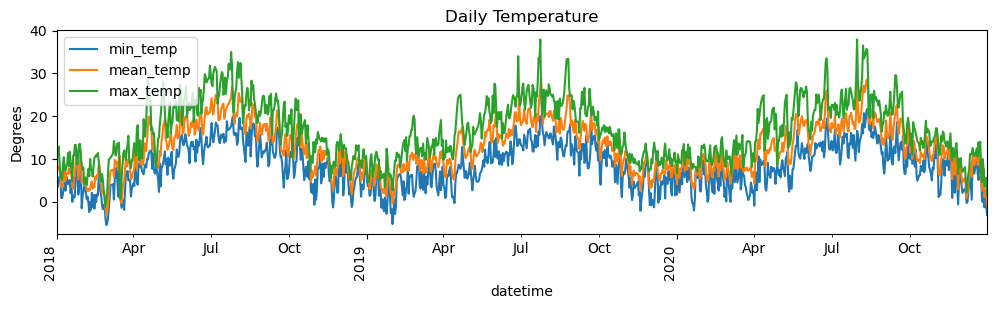

In [22]:
# We'll want a wide figure to contain all three timelines
ax = df_ts.plot(figsize=(12,3))
ax.set_title("Daily Temperature")
ax.set_ylabel("Degrees")

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

## Plot precipitation from 2000 to 2020

In [23]:
# We'll need another df just for rain and snow
cols = ['precipitation','snow_depth']
dfp  = df.loc["2000":,cols]
dfp

,precipitation,snow_depth
datetime,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2020-12-27,2.0,NaN
2020-12-28,0.2,NaN
2020-12-29,0.0,NaN


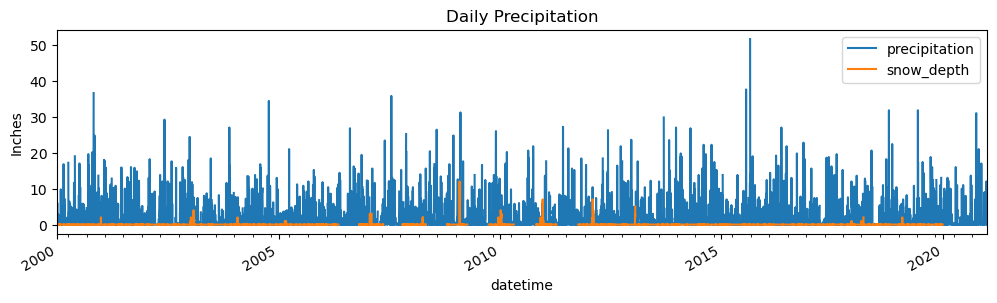

In [33]:
ax = dfp.plot(figsize=(12,3))
ax.set( title='Daily Precipitation',
      ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=5)

ax.xaxis.set_minor_locator(minor_loc)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate()